In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

In [23]:
data_2010 = pd.read_csv('Failure_modelling/Failure_Data/failures_2010.csv', delimiter=';')
data_2011 = pd.read_csv('Failure_modelling/Failure_Data/failures_2011.csv', delimiter=';')
data_2012 = pd.read_csv('Failure_modelling/Failure_Data/failures_2012.csv', delimiter=';')
data_2013 = pd.read_csv('Failure_modelling/Failure_Data/failures_2013.csv', delimiter=';')
data_2014 = pd.read_csv('Failure_modelling/Failure_Data/failures_2014.csv', delimiter=';')
data_2015 = pd.read_csv('Failure_modelling/Failure_Data/failures_2015.csv', delimiter=';')
data_2016 = pd.read_csv('Failure_modelling/Failure_Data/failures_2016.csv', delimiter=';')
data_2017 = pd.read_csv('Failure_modelling/Failure_Data/failures_2017.csv', delimiter=';')
data_2018 = pd.read_csv('Failure_modelling/Failure_Data/failures_2018.csv', delimiter=';')
data_2019 = pd.read_csv('Failure_modelling/Failure_Data/failures_2019.csv', delimiter=';')
data = pd.concat([data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019], axis=0)
data = data.reset_index()
display(data)

,index,Unnamed: 0,relatie_code,storing_idnummer,storing_melddatum,storing_medium,storing_materiaal,storing_type,storing_type_hulpstuk,storing_aanlegjaar,...,storing_verkeersdrempels,storing_drempelafstand,storing_verschijningsvorm,storing_bescherminginwendig,storing_soortoorzaak,storing_oorzaak1spontanestoring,storing_oorzaak2spontanestoring,storing_oorzaakinternebedrijfsvoering,storing_storendobject,Unnamed: 29
0,0,418,C,-,2010-03-05,-,MAT_GG,TYP_LMOF,-,1975,...,-,-,-,BI_GG_GEEN,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
1,1,978,B,-,2010-06-03,-,MAT_ST,-,-,1954,...,-,-,BUIS_AND,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,-,NaN
2,2,359,A,-,2010-02-24,-,MAT_PVC,-,-,1990,...,-,-,BUIS_SCHERF,-,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
3,3,2049,B,-,2010-09-29,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
4,4,444,A,-,2010-03-10,-,MAT_AC,TYP_NTRV_STEEK,-,1960,...,-,-,VERB_SCHUIF,-,ORZ_SPONTAAN,ORZ_SPON1_UITWBEL,NaN,NaN,VERB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,128,165,B,-1,2019-01-27,DW,MAT_GG,NaN,-,1934,...,DREMP_ONB,-,BUIS_RONDBR,BI_GG_GEEN,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2306,129,2228,B,50478342,2019-12-09,DW,MAT_AC,NaN,-,1976,...,DREMP_ONB,-,BUIS_LENGTES,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2307,130,1611,B,50471369,2019-09-09,DW,MAT_ST,NaN,-,1973,...,DREMP_ONB,-,BUIS_PUNTLEK,BI_ST_ONB,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2308,131,2231,B,50478354,2019-12-09,DW,MAT_AC,NaN,-,1973,...,DREMP_ONB,-,BUIS_SCHERF,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN


In [24]:
data_spontaneous_cause = data #Filter on only spontaneous failures becasue we are interesed in detererioration failure modelling
data_good_construction_year = data_spontaneous_cause[data_spontaneous_cause['storing_aanlegjaar'] != -1] #Cannot know identirfy age of pipe if construction year is unknown
data_good_construction_year.loc[:,'storing_melddatum'] = pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d')
data_good_construction_year.loc[:,'storing_aanlegjaar'] = pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y')
data_good_construction_year.loc[:,'age_at_failure'] = (pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d').values - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)
data_good_construction_year.loc[:,'construction_year_vs_graph_year'] = (pd.to_datetime(['2020']*len(data_good_construction_year.loc[:,'storing_aanlegjaar']), format='%Y') - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)
data_good_mat = data_good_construction_year[data_good_construction_year['storing_materiaal'] != '-']

(1 - (len(data_good_mat) / len(data)))*100

C:\Users\Jip\AppData\Local\Temp\ipykernel_14248\1536343394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good_construction_year.loc[:,'age_at_failure'] = (pd.to_datetime(data_good_construction_year.loc[:,'storing_melddatum'], format='%Y-%m-%d').values - pd.to_datetime(data_good_construction_year.loc[:,'storing_aanlegjaar'], format='%Y').values) /  pd.Timedelta(days=365.25)
C:\Users\Jip\AppData\Local\Temp\ipykernel_14248\1536343394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_good_cons

2.0346320346320335

In [25]:
data_spontaneous_cause[data_spontaneous_cause['storing_aanlegjaar'] == -1]

,index,Unnamed: 0,relatie_code,storing_idnummer,storing_melddatum,storing_medium,storing_materiaal,storing_type,storing_type_hulpstuk,storing_aanlegjaar,...,storing_verkeersdrempels,storing_drempelafstand,storing_verschijningsvorm,storing_bescherminginwendig,storing_soortoorzaak,storing_oorzaak1spontanestoring,storing_oorzaak2spontanestoring,storing_oorzaakinternebedrijfsvoering,storing_storendobject,Unnamed: 29
3,3,2049,B,-,2010-09-29,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
97,97,927,B,-,2010-05-26,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
100,100,1694,B,-,2010-08-12,-,MAT_PVC,-,-,-1,...,-,-,BUIS_LENGTES,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
107,107,1385,B,-,2010-07-13,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
116,116,1512,B,-,2010-07-19,-,-,-,-,-1,...,-,-,VERB_AND,-,ORZ_SPONTAAN,NaN,NaN,NaN,VERB,NaN
176,176,2119,B,-,2010-10-08,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
186,186,528,A,-,2010-03-23,-,MAT_AC,TYP_NTRV_STEEK,-,-1,...,-,-,VERB_SCHUIF,-,ORZ_EXTERN,NaN,NaN,NaN,VERB,NaN
214,214,1566,B,-,2010-07-26,-,-,-,-,-1,...,-,-,-,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,VERB,NaN
250,250,2193,B,-,2010-10-16,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
285,285,1552,B,-,2010-07-22,-,MAT_AC,-,-,-1,...,-,-,BUIS_AND,-,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN


In [26]:
data

,index,Unnamed: 0,relatie_code,storing_idnummer,storing_melddatum,storing_medium,storing_materiaal,storing_type,storing_type_hulpstuk,storing_aanlegjaar,...,storing_verkeersdrempels,storing_drempelafstand,storing_verschijningsvorm,storing_bescherminginwendig,storing_soortoorzaak,storing_oorzaak1spontanestoring,storing_oorzaak2spontanestoring,storing_oorzaakinternebedrijfsvoering,storing_storendobject,Unnamed: 29
0,0,418,C,-,2010-03-05,-,MAT_GG,TYP_LMOF,-,1975,...,-,-,-,BI_GG_GEEN,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
1,1,978,B,-,2010-06-03,-,MAT_ST,-,-,1954,...,-,-,BUIS_AND,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,-,NaN
2,2,359,A,-,2010-02-24,-,MAT_PVC,-,-,1990,...,-,-,BUIS_SCHERF,-,ORZ_SPONTAAN,NaN,NaN,NaN,BUIS,NaN
3,3,2049,B,-,2010-09-29,-,MAT_ST,-,-,-1,...,-,-,BUIS_PUNTLEK,-,ORZ_SPONTAAN,ORZ_SPON1_AANT,NaN,NaN,BUIS,NaN
4,4,444,A,-,2010-03-10,-,MAT_AC,TYP_NTRV_STEEK,-,1960,...,-,-,VERB_SCHUIF,-,ORZ_SPONTAAN,ORZ_SPON1_UITWBEL,NaN,NaN,VERB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,128,165,B,-1,2019-01-27,DW,MAT_GG,NaN,-,1934,...,DREMP_ONB,-,BUIS_RONDBR,BI_GG_GEEN,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2306,129,2228,B,50478342,2019-12-09,DW,MAT_AC,NaN,-,1976,...,DREMP_ONB,-,BUIS_LENGTES,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2307,130,1611,B,50471369,2019-09-09,DW,MAT_ST,NaN,-,1973,...,DREMP_ONB,-,BUIS_PUNTLEK,BI_ST_ONB,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN
2308,131,2231,B,50478354,2019-12-09,DW,MAT_AC,NaN,-,1973,...,DREMP_ONB,-,BUIS_SCHERF,-,ORZ_SPONTAAN,ORZ_SPON1_ONB,-,-,BUIS,NaN


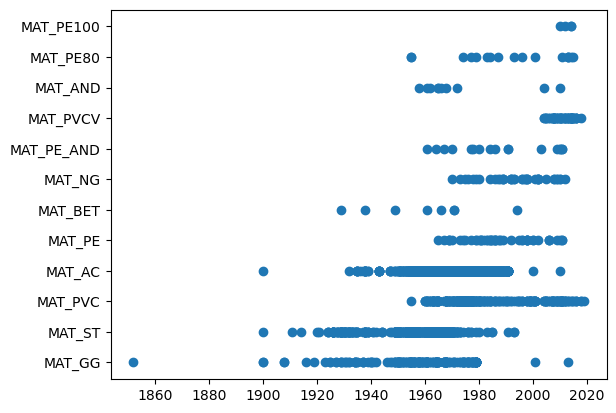

In [27]:
data = data_good_mat.copy()
plt.scatter(x=data['storing_aanlegjaar'], y=data['storing_materiaal'])


In [28]:
data_pipes = pd.read_csv(
    "Failure_modelling/Failure_Data/2024_processed_leidingen_glisexport.csv",
    delimiter=";",
    index_col=0,
)
# data_pipes_length_per_construction_year = pd.DataFrame(data_pipes['Lengte'].groupby(data_pipes['Aanlegjaar']).sum())
# data_pipes_length_per_construction_year_corrected = data_pipes_length_per_construction_year[data_pipes_length_per_construction_year.index > 2] #Filter out construction years -1 and 1
# data_pipes_length_per_construction_year_corrected.index = pd.to_datetime(data_pipes_length_per_construction_year_corrected.index, format='%Y')
# data_pipes_length_per_construction_year_corrected
display(data_pipes)

,Batch jaartal,Aanlegjaar,ID nummer,Lengte,Diameter,Materiaalcode,Bedrijf,Bescherming uitwendig,Bescherming inwendig,Relining,Kathodische bescherming
2166783,2018,1974,233514287,368.595185,200,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-
2196114,2019,1968,177852534,117.991714,100,MAT_GG,B,-,-,RELIN_NEE,KB_NEE
2055089,2018,2001,177622476,39.556610,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
1668377,2016,2001,-1,6436.656000,504,MAT_NG,C,-,-,-,-
2115381,2018,1992,178402238,31.352994,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
...,...,...,...,...,...,...,...,...,...,...,...
2073596,2018,1989,177860883,36.457173,110,MAT_PVC,B,-,-,RELIN_NEE,-
2126919,2018,1989,178554099,7.511757,200,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-
2113317,2018,1992,178370569,104.638249,100,MAT_NG,B,BU_NG_PE,BI_NG_CL,RELIN_NEE,KB_NEE
2115420,2018,1966,178402661,129.786245,100,MAT_AC,B,BU_AC_GEEN,-,RELIN_NEE,-


In [29]:
data_pipes['Diameter'].unique()

array([ 200,  100,  504,  110,   50,   63,  150,  204,   80,  160,  111,
        800,   40,  970,  400,  125,  250,  315,   32,   21,   51,  500,
        118,   25,   90,  300,  235,  194,  251,  350,  152,  692,   28,
         75,  151,  600,  700,  175,  309,  355,   31, 1500,  560,  154,
        102,   20,  231,  463,  610,   66,  481,   49,  900,   35, 1200,
        304,  450,  770,  769,  128,   45,  115,  306,  103,  377,  380,
         54,  142,  188,  126,   15,   98,  221, 1169,   85,  297,   22,
        215,   42,  980,   71,   -1,  516,  541,  116,  195,    1,  616,
        178,   52,   16,  704,   27,  471,   77,  279,  381,   55,   53,
         39,   26,  583,  762,  386,   92,   97,  630, 1000,  177,  508,
        255,  896,  222,   43,   13,  219,  679, 1492,  301,   59,  403,
         93,  225,   44,  205,   60,  258,   30,  506,  275,  876,  807,
        294,  618,  198,  605,  620,  288,  211,  244,  254,  710,   67,
        443,  144, 1400,  569,   34,  140,  401,   

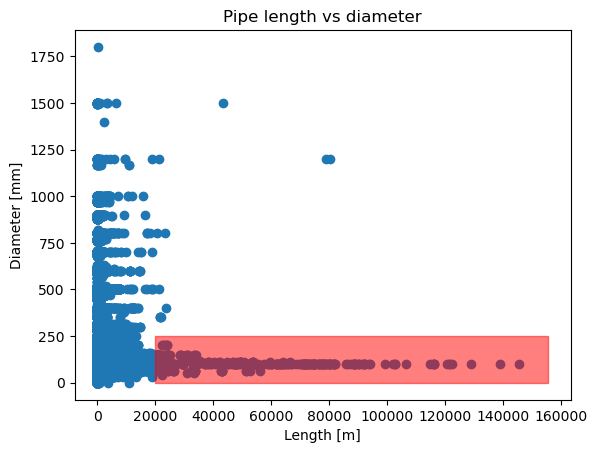

In [30]:
plt.scatter(x=data_pipes['Lengte'], y=data_pipes['Diameter'])
plt.xlabel('Length [m]')
plt.ylabel('Diameter [mm]')

x_vertices = [20000, data_pipes['Lengte'].max()+10000, data_pipes['Lengte'].max()+10000, 20000]
y_vertices = [250, 250, data_pipes['Diameter'].min(), data_pipes['Diameter'].min()]

plt.fill(x_vertices, y_vertices, color='red', alpha=0.5)
plt.title('Pipe length vs diameter')
plt.show()


In [31]:
data_pipes_length_corrected = data_pipes[~((data_pipes['Lengte'] > 20000) & (data_pipes['Diameter'] < 250))]
data_pipes_year_corrected = data_pipes_length_corrected[data_pipes_length_corrected['Aanlegjaar'] > 1]

0.7407682224035983

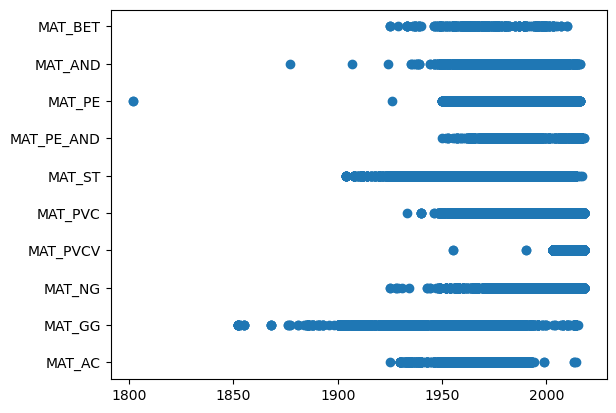

In [32]:
plt.scatter(x=data_pipes_year_corrected['Aanlegjaar'], y=data_pipes_year_corrected['Materiaalcode'])
data_pipes_material_corrected = data_pipes_year_corrected[~((data_pipes_year_corrected['Materiaalcode'] == 'MAT_PE') & (data_pipes_year_corrected['Aanlegjaar'] < 1898))]


In [33]:
data_pipe_diameter.to_csv('Failure_modelling/Failure_Data/pipe_data.csv')
data.to_csv('Failure_modelling/Failure_Data/failure_data.csv')

In [34]:
data['storing_materiaal'].unique()

array(['MAT_GG', 'MAT_ST', 'MAT_PVC', 'MAT_AC', 'MAT_PE', 'MAT_BET',
       'MAT_NG', 'MAT_PE_AND', 'MAT_PVCV', 'MAT_AND', 'MAT_PE80',
       'MAT_PE100'], dtype=object)

In [35]:
data['storing_diameter'].unique()

array([  80.,  160.,   50.,  150.,  100.,  110.,   63.,  200.,  125.,
        500.,  152.,  128.,  103.,  188.,  297.,   49.,  118.,  300.,
        250.,  315.,   40.,   32.,  151.,   25.,  980.,  251.,  807.,
         51.,  154.,  254.,  896.,   31.,  175.,   93.,   90.,   97.,
        516.,  126.,  225.,   75.,   85.,   71.,  275.,  700.,  204.,
         28., 1000.,  400.,  235.,  463.,  306.,  304.,  800.,  111.,
        377.,  762.,  142.,  102.,   53.,  279.,  255.,   77.,   45.,
        350.])